<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/class_march_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# [Medidas de desempeño para un clasificador](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf) 

## Medición de la exactitud mediante validación cruzada

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we
will spend a large part of this chapter on this topic. 

There are many performance measures available, so grab another coffee and get ready to learn many new concepts and acronyms!

## Measuring Accuracy Using Cross-Validation  

A good way to evaluate a model is to use cross-validation, just as you did in Chapter 2.

## Implementing Cross-Validation  

Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off-the-shelf. 

In these cases, you can implement cross- validation yourself; it is actually fairly straightforward. 

The following code does roughly the same thing as Scikit-Learn’s `cross_val_score()` function, and prints the same result:

In [5]:
import numpy as np 
from sklearn.datasets import fetch_openml 

In [2]:
mnist = fetch_openml('mnist_784', version = 1) 

In [8]:
X,y = mnist['data'], mnist['target'] 

# Convertir a arreglos de numpy de valores enteros

In [9]:
X = X.values
y = y.values.astype(np.int64) 

In [10]:
y[0]

5

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
    skfolds = StratifiedKFold(n_splits=3, random_state=42)
    for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.9649

# Multiclass Classification  

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases.

Algunos algoritmos (como los clasificadores SGD, los clasificadores Random Forest y los clasificadores Naive Bayes) son capaces de manejar varias clases de forma nativa.

Otros (como los clasificadores de regresión logística o de máquina de soporte vectorial) son clasificadores estrictamente binarios.

Sin embargo, existen varias estrategias que puede utilizar para realizar una clasificación multiclase con varios clasificadores binarios.

Una forma de crear un sistema que pueda clasificar las imágenes de dígitos en 10 clases (del 0 al 9) es entrenar 10 clasificadores binarios, uno para cada dígito (un detector 0, un detector 1, un detector 2, etc.). en).

Luego, cuando desea clasificar una imagen, obtiene el puntaje de decisión de cada clasificador para esa imagen y selecciona la clase cuyo clasificador genera el puntaje más alto.

Esto se denomina estrategia uno contra el resto (OvR) (también llamada uno contra todos).

Otra estrategia es entrenar un clasificador binario para cada par de dígitos: uno para distinguir 0s y 1s, otro para distinguir 0s y 2s, otro para 1s y 2s, y así sucesivamente.

Esto se llama la estrategia uno contra uno (OvO).

Si hay N clases, necesita entrenar N × (N – 1) / 2 clasificadores.

Para el problema MNIST, ¡esto significa entrenar 45 clasificadores binarios!

Cuando desee clasificar una imagen, debe ejecutar la imagen a través de los 45 clasificadores y ver qué clase gana la mayor cantidad de duelos.

La principal ventaja de OvO es que cada clasificador solo necesita ser entrenado en la parte del conjunto de entrenamiento para las dos clases que debe distinguir.

Algunos algoritmos (como los clasificadores de máquinas de soporte vectorial) escalan mal con el tamaño del conjunto de entrenamiento.

Para estos algoritmos, se prefiere OvO porque es más rápido entrenar muchos clasificadores en pequeños conjuntos de entrenamiento que entrenar pocos clasificadores en grandes conjuntos de entrenamiento.

Sin embargo, para la mayoría de los algoritmos de clasificación binaria, se prefiere OvR.

Scikit-Learn detecta cuando intenta utilizar un algoritmo de clasificación binaria para una tarea de clasificación multiclase y automáticamente ejecuta OvR u OvO, según el algoritmo.

Intentemos esto con un clasificador de máquina de soporte vectorial, usando la clase sklearn.svm.SVC:

In [2]:
from sklearn.datasets import fetch_openml 

mnist = fetch_openml('mnist_784', version = 1) 

In [3]:
X,y = mnist['data'], mnist['target'] 

In [4]:
import numpy as np 

X = X.values
y = y.values.ravel().astype(np.int64) 

In [6]:
X_train, X_test, y_train, y_test = X[:60_000,:], X[60_000:,:], y[:60_000], y[60_000:] 

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5

In [8]:
svm_clf.predict(X[:5,:])

array([5, 0, 4, 1, 9], dtype=int64)

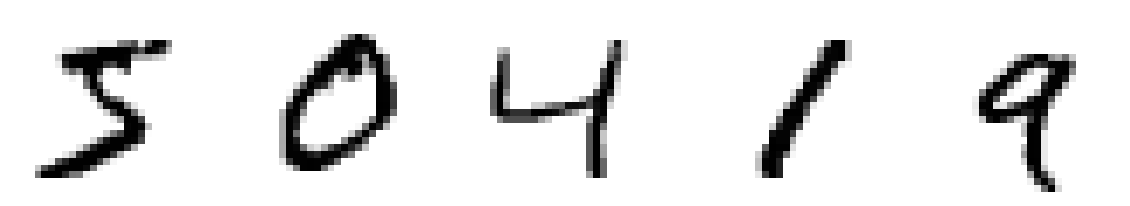

In [9]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,5, figsize = (20,6)) 

for i in range(5):
    ax[i].imshow(X[i,:].reshape(28, 28), cmap = 'binary')
    ax[i].axis('off')
    
plt.show()     


¡Eso fue fácil! Este código entrena el SVC en el conjunto de entrenamiento usando las clases de destino originales de 0 a 9 (`y_train`), en lugar de las clases de destino de 5 contra el resto (`y_train_5`).

Luego hace una predicción (una correcta en este caso).

Debajo del capó, Scikit-Learn en realidad usó la estrategia OvO: entrenó a 45 clasificadores binarios, obtuvo sus puntajes de decisión para la imagen y seleccionó la clase que ganó la mayor cantidad de duelos.

Si llama al método `decision_function()`, verá que devuelve 10 puntuaciones por instancia (en lugar de solo 1). Esa es una puntuación por clase:

In [10]:
some_digit_scores = svm_clf.decision_function([X[0,:]])
some_digit_scores


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

De hecho, la puntuación más alta es la correspondiente a la clase 5:

In [11]:
np.argmax(some_digit_scores)

5

In [12]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [13]:
svm_clf.classes_[5]

5

## ADVERTENCIA

Cuando se entrena un clasificador, almacena la lista de clases objetivo en su atributo `classes_`, ordenadas por valor.

En este caso, el índice de cada clase en el arreglo `classes_` coincide convenientemente con la clase misma (por ejemplo, la clase en el índice 5 resulta ser la clase 5), pero en general no tendrá tanta suerte.

Si desea forzar a Scikit-Learn a usar uno contra uno o uno contra el resto, puede usar las clases `OneVsOneClassifier` o `OneVsRestClassifier`.

Simplemente cree una instancia y pase un clasificador a su constructor (ni siquiera tiene que ser un clasificador binario).

Por ejemplo, este código crea un clasificador multiclase usando la estrategia OvR, basado en un SVC:

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([X[0,:]])

In [ ]:
len(ovr_clf.estimators_)

Entrenar un `SGDClassifier` (o un `RandomForestClassifier`) es igual de fácil:

In [15]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state = 42) 

In [16]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[0,:]])


array([3], dtype=int64)

Esta vez, Scikit-Learn no tuvo que ejecutar OvR ni OvO porque los clasificadores SGD pueden clasificar directamente las instancias en varias clases.

The `decision_function()` method now returns one value per class. 

Let’s look at the score that the SGD classifier assigned to each class:

In [ ]:
>>> sgd_clf.decision_function([some_digit])

You can see that the classifier is fairly confident about its prediction: almost all scores are largely negative, while class 5 has a score of 2412.5. 

The model has a slight doubt regarding class 3, which gets a score of 573.5. Now of course you want to evaluate this classifier. 

As usual, you can use cross-validation. 

Use the cross_val_score() function to evaluate the SGDClassifier’s accuracy:

In [ ]:
>>> cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


It gets over 84% on all test folds. 

If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. 

Simply scaling the inputs (as discussed in Chapter 2) increases
accuracy above 89%:

In [ ]:
from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler()
>>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
>>> cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


## Error Analysis

If this were a real project, you would now follow the steps in your Machine Learning project checklist (see Appendix B). 

You’d explore data preparation options, try out multiple models (shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV), and automate as much as possible. 

Here, we will assume that you have found a promising model and you want to find ways to improve it. 

One way to do this is to analyze the types of errors it makes.

First, look at the confusion matrix. 

You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier:

In [ ]:
>>> y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
>>> conf_mx = confusion_matrix(y_train, y_train_pred)
>>> conf_mx